# Import All Libraries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Import the Dataset

In [2]:
titanic = pd.read_csv(r"C:\Users\Williams\Desktop\datascience\AiPlusInvasion\Data\titanic_train.csv")

In [3]:
#copy the dataset into another variable
titanic_copy = titanic.copy()

# Inspect the Dataset

In [4]:
#inspect the records
titanic_copy

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,158,1,"Hipkins, Mr. William Edward",male,55.0,0,0,680,50.0000,C39,S,NaN,NaN,London / Birmingham,0
846,174,1,"Kent, Mr. Edward Austin",male,58.0,0,0,11771,29.7000,B37,C,NaN,258.0,"Buffalo, NY",0
847,467,2,"Kantor, Mrs. Sinai (Miriam Sternin)",female,24.0,1,0,244367,26.0000,NaN,S,12,NaN,"Moscow / Bronx, NY",1
848,1112,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S,NaN,NaN,NaN,0


In [5]:
titanic_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  850 non-null    int64  
 1   pclass        850 non-null    int64  
 2   name          850 non-null    object 
 3   sex           850 non-null    object 
 4   age           676 non-null    float64
 5   sibsp         850 non-null    int64  
 6   parch         850 non-null    int64  
 7   ticket        850 non-null    object 
 8   fare          849 non-null    float64
 9   cabin         191 non-null    object 
 10  embarked      849 non-null    object 
 11  boat          308 non-null    object 
 12  body          73 non-null     float64
 13  home.dest     464 non-null    object 
 14  survived      850 non-null    int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 99.7+ KB


In [6]:
#inspect the statistics of the dataset
titanic_copy.describe()

,passenger_id,pclass,age,sibsp,parch,fare,body,survived
count,850.000000,850.00000,676.000000,850.000000,850.000000,849.000000,73.000000,850.000000
mean,662.816471,2.32000,29.519847,0.522353,0.382353,34.012701,165.821918,0.368235
std,380.751936,0.83853,14.562243,1.112132,0.879511,53.705779,99.068487,0.482610
min,1.000000,1.00000,0.166700,0.000000,0.000000,0.000000,4.000000,0.000000
25%,332.250000,2.00000,20.000000,0.000000,0.000000,7.895800,75.000000,0.000000
50%,676.500000,3.00000,28.000000,0.000000,0.000000,14.108300,166.000000,0.000000
75%,992.250000,3.00000,37.000000,1.000000,0.000000,31.000000,260.000000,1.000000
max,1307.000000,3.00000,80.000000,8.000000,9.000000,512.329200,328.000000,1.000000


In [7]:
#inspect the dimension of the dataset
titanic_copy.shape

(850, 15)

In [8]:
#inspect for columns with missing rows
titanic_copy.isnull().sum()

passenger_id      0
pclass            0
name              0
sex               0
age             174
sibsp             0
parch             0
ticket            0
fare              1
cabin           659
embarked          1
boat            542
body            777
home.dest       386
survived          0
dtype: int64

In [9]:
#inspect the data types in order to know the columns with categorical values
titanic_copy.dtypes

passenger_id      int64
pclass            int64
name             object
sex              object
age             float64
sibsp             int64
parch             int64
ticket           object
fare            float64
cabin            object
embarked         object
boat             object
body            float64
home.dest        object
survived          int64
dtype: object

# Data Preparation And Cleaning

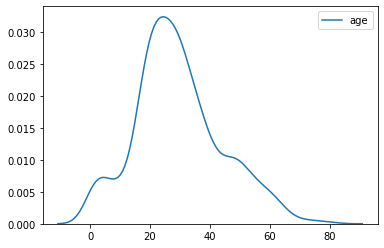

In [10]:
#Visualise the KDE of age
sns.kdeplot(titanic_copy.age)

In [11]:
#Fill the null values of "age" with the mean of the "age" column
titanic_copy.age.fillna(np.round(titanic_copy.age.mean()), inplace=True)

In [12]:
#Fill the null values of "body" with the mean of the "body" column
titanic_copy.body.fillna(np.round(titanic_copy.body.mean()), inplace=True)

In [13]:
#Fill the null values of "fare" with the upper quartile of the "fare" column
titanic_copy.fare.fillna(np.quantile(titanic_copy.fare.mean(), 0.75), inplace=True)

In [14]:
#Fill the null values of "embarked" with the mode of the "embarked" column
titanic_copy.embarked.fillna(titanic_copy.embarked.mode()[0], inplace=True)

In [15]:
#inspect the "boat" column
titanic_copy.boat.value_counts()

4          25
C          24
14         23
13         23
15         19
16         18
9          18
10         18
3          16
11         16
7          14
D          14
8          13
6          12
5          12
12         11
A          10
2           9
B           4
C D         2
1           2
15 16       1
13 15       1
5 7         1
13 15 B     1
5 9         1
Name: boat, dtype: int64

In [16]:
#save the mode of "boat" column grouped by "sex" in two variables
no_boat_male = titanic_copy.groupby("sex").get_group("male")["boat"].mode()[0]
no_boat_female = titanic_copy.groupby("sex").get_group("female")["boat"].mode()[0]

In [17]:
#use the values above to fill the NAs in "boat" column and save in two variables
boat_male_null = titanic_copy.groupby("sex").get_group("male")["boat"].fillna(value=no_boat_male)
boat_female_null = titanic_copy.groupby("sex").get_group("female")["boat"].fillna(value=no_boat_female)

In [18]:
#update the dataset with these variables
titanic_copy["boat"].update(boat_male_null)
titanic_copy["boat"].update(boat_female_null)

In [20]:
#Fill the null values of "cabin" with the mode of the "cabin" column
titanic_copy.cabin.fillna(titanic_copy.cabin.mode()[0], inplace=True)

In [21]:
#inspect the "pclass" column
titanic_copy.pclass.value_counts()

3    478
1    206
2    166
Name: pclass, dtype: int64

In [22]:
#save the mode of "home.dest" column grouped by "pclass" in three variables
no_homedest_1 = titanic_copy.groupby("pclass").get_group(1)["home.dest"].mode()[0]
no_homedest_2 = titanic_copy.groupby("pclass").get_group(2)["home.dest"].mode()[0]
no_homedest_3 = titanic_copy.groupby("pclass").get_group(3)["home.dest"].mode()[0]

In [23]:
#use the values above to fill the NAs in "home.dest" column and save in three variables
homedest_1_null = titanic_copy.groupby("pclass").get_group(1)["home.dest"].fillna(value=no_boat_male)
homedest_2_null = titanic_copy.groupby("pclass").get_group(2)["home.dest"].fillna(value=no_boat_male)
homedest_3_null = titanic_copy.groupby("pclass").get_group(3)["home.dest"].fillna(value=no_boat_male)

In [24]:
#update the dataset with these variables
titanic_copy["home.dest"].update(homedest_1_null)
titanic_copy["home.dest"].update(homedest_2_null)
titanic_copy["home.dest"].update(homedest_3_null)

In [25]:
#inspect the whole dataset for missing values after cleaning
titanic_copy.isnull().sum()

passenger_id    0
pclass          0
name            0
sex             0
age             0
sibsp           0
parch           0
ticket          0
fare            0
cabin           0
embarked        0
boat            0
body            0
home.dest       0
survived        0
dtype: int64

In [26]:
#inspect all the columns with object datatype
titanic_copy.select_dtypes("object").head()

,name,sex,ticket,cabin,embarked,boat,home.dest
0,"Smyth, Miss. Julia",female,335432,B57 B59 B63 B66,Q,13,15
1,"Cacic, Mr. Luka",male,315089,B57 B59 B63 B66,S,15,Croatia
2,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,345773,B57 B59 B63 B66,S,4,15
3,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,29105,B57 B59 B63 B66,S,4,"Cornwall / Akron, OH"
4,"Veal, Mr. James",male,28221,B57 B59 B63 B66,S,15,"Barre, Co Washington, VT"


# Data Encoding

In [27]:
titanic_copy_encoded = pd.get_dummies(titanic_copy, columns=["sex","embarked"], drop_first=True)
titanic_copy_encoded

,passenger_id,pclass,name,age,sibsp,parch,ticket,fare,cabin,boat,body,home.dest,survived,sex_male,embarked_Q,embarked_S
0,1216,3,"Smyth, Miss. Julia",30.0,0,0,335432,7.7333,B57 B59 B63 B66,13,166.0,15,1,0,1,0
1,699,3,"Cacic, Mr. Luka",38.0,0,0,315089,8.6625,B57 B59 B63 B66,15,166.0,Croatia,0,1,0,1
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",30.0,1,1,345773,24.1500,B57 B59 B63 B66,4,166.0,15,0,0,0,1
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",54.0,1,3,29105,23.0000,B57 B59 B63 B66,4,166.0,"Cornwall / Akron, OH",1,0,0,1
4,576,2,"Veal, Mr. James",40.0,0,0,28221,13.0000,B57 B59 B63 B66,15,166.0,"Barre, Co Washington, VT",0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,158,1,"Hipkins, Mr. William Edward",55.0,0,0,680,50.0000,C39,15,166.0,London / Birmingham,0,1,0,1
846,174,1,"Kent, Mr. Edward Austin",58.0,0,0,11771,29.7000,B37,15,258.0,"Buffalo, NY",0,1,0,0
847,467,2,"Kantor, Mrs. Sinai (Miriam Sternin)",24.0,1,0,244367,26.0000,B57 B59 B63 B66,12,166.0,"Moscow / Bronx, NY",1,0,0,1
848,1112,3,"Peacock, Miss. Treasteall",3.0,1,1,SOTON/O.Q. 3101315,13.7750,B57 B59 B63 B66,4,166.0,15,0,0,0,1


# Feature Selection

In [28]:
X = titanic_copy_encoded.drop(["passenger_id", "name", "ticket", "cabin", "boat", "home.dest"], axis=1)
y = titanic_copy_encoded.survived

pclass          int64
age           float64
sibsp           int64
parch           int64
fare          float64
body          float64
survived        int64
sex_male        uint8
embarked_Q      uint8
embarked_S      uint8
dtype: object

# Build the Model

<h4>Linear Regression And Random Forest Classifier Model Function</h4>

In [29]:
def Model(X, y, model):
    try:
        #split the data
        X_train_validation, X_test, y_train_validation, y_test = train_test_split(X, y, random_state=0)
        X_train, X_validation, y_train, y_validation = train_test_split(X_train_validation, y_train_validation, random_state=0)
        #scale the features
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_validation_scaled = scaler.transform(X_validation)
        X_test_scaled = scaler.transform(X_test)
        if model == 1:
            #train the Random Forest model
            reg = RandomForestClassifier(random_state=0)
            reg.fit(X_train_scaled, y_train)
            print("Random Forest Classifier DONE...")
        elif model == 2:
            #build the Logistic Regression model
            reg = LogisticRegression()
            reg.fit(X_train_scaled, y_train)
            print("Logistic Regression DONE...")
        else:
            print("Invalid input")
        return X_train_scaled, X_validation_scaled, X_test_scaled, y_train, y_validation, y_test, reg
    except:
        pass

<h4>Parameter Tuning Function</h4>

In [30]:
def Parametertuning(X_train_scaled, X_validation_scaled, y_train, y_validation, model):
    try:
        train_accuracy = []
        validation_accuracy = []
        #hyper-parameter tuning and get the best value of regularization constant c in order to avoid overfitting
        if model == 1:
            #hyper-parameter tune and get the best value of the number of trees in the forest in order to avoid overfitting
            no_of_trees = [1, 2, 5, 10, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
            for tree in no_of_trees:
                reg = RandomForestClassifier(n_estimators=tree, random_state=0)
                reg.fit(X_train_scaled, y_train)
                train_accuracy.append(reg.score(X_train_scaled, y_train))
                validation_accuracy.append(reg.score(X_validation_scaled, y_validation))
            plt.plot(no_of_trees, train_accuracy, label = "Training Accuracy")
            plt.plot(no_of_trees, validation_accuracy, label = "Validation Accuracy")
            plt.legend()
            plt.xlabel("No. of Trees")
            plt.ylabel("Accuracies")
            plt.show()
        elif model == 2:
            values_of_C = [0.01, 0.02, 0.05, 0.1, 0.15, 0.2, 0.25, 0.5, 0.6, 0.8]
            for c in values_of_C:
                reg = LogisticRegression(C = c)
                reg.fit(X_train_scaled, y_train)
                train_accuracy.append(reg.score(X_train_scaled, y_train))
                validation_accuracy.append(reg.score(X_validation_scaled, y_validation))
            plt.plot(values_of_C, train_accuracy, label = "Training Accuracy")
            plt.plot(values_of_C, validation_accuracy, label = "Validation Accuracy")
            plt.legend()
            plt.xlabel("Values of C")
            plt.ylabel("Accuracies")
            plt.show()
    except:
        pass

<h4>Parameter Tuning Function</h4>

In [31]:
def Retrain(X_train_scaled, y_train, k, model):
    try:
        #re-train the Logistic Regression model
        if model == 1:
            reg = RandomForestClassifier(n_estimators=k, random_state=0)
            reg.fit(X_train_scaled, y_train)
        #re-train the Random Forest model
        elif model == 2:
            reg = LogisticRegression(C=k)
            reg.fit(X_train_scaled, y_train)
        return reg
    except:
        pass

In [32]:
#call the model function and unpack it for Random Forest Classifier
reg_type=int(input("Enter 1 for Random Forest Classifier... Enter 2 for Logistic Regression: "))
X_train_scaled, X_validation_scaled, X_test_scaled, y_train, y_validation, y_test, reg = Model(X, y, reg_type)

Enter 1 for Random Forest Classifier... Enter 2 for Logistic Regression:  1


Random Forest Classifier DONE...


<h4>Predict And Evaluate Performance</h4>

In [33]:
#predict the output of the Validation dataset
y_pred1 = reg.predict(X_validation_scaled)
print(titanic_copy_encoded["survived"][y_pred1].values)
print(titanic_copy_encoded["survived"][y_pred1].value_counts())

[1 1 0 1 1 0 1 0 1 1 1 1 0 1 0 1 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 1 0 1 1
 0 1 1 1 1 1 1 0 1 0 0 0 1 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1
 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 1 1 1 1 1 0 0 1 1 0 0 0 1 0 1
 1 1 1 1 1 0 0 1 1 1 1 0]
1    101
0     59
Name: survived, dtype: int64


In [34]:
#check the performance of the model on the training and validation dataset
print(f"Train Accuracy: \t{reg.score(X_train_scaled, y_train)*100:.4}%")
print(f"Validation Accuracy: \t{reg.score(X_validation_scaled, y_validation)*100:.4}%")

Train Accuracy: 	100.0%
Validation Accuracy: 	100.0%


<h4>Tune The Parameters And Retrain The Model</h4>

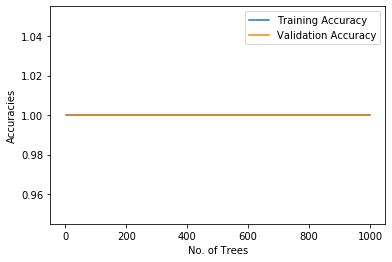

In [35]:
Parametertuning(X_train_scaled, X_validation_scaled, y_train, y_validation, reg_type)

In [36]:
tree = int(input("Enter a good approximate number of trees: "))
reg_new = Retrain(X_train_scaled, y_train, tree, reg_type)

Enter a good approximate number of trees:  2


In [37]:
#check the performance of the new model
print(f"Modified Train Accuracy: \t{reg_new.score(X_train_scaled, y_train)*100:.4}%")
print(f"Modified Validation Accuracy: \t{reg_new.score(X_validation_scaled, y_validation)*100:.4}%")
print(f"Modified Test Accuracy: \t{reg_new.score(X_test_scaled, y_test)*100:.4}%")

Modified Train Accuracy: 	100.0%
Modified Validation Accuracy: 	100.0%
Modified Test Accuracy: 	100.0%


In [38]:
#call the model function and unpack it for Logistic Regression
reg_type=float(input("Enter 1 for Random Forest Classifier... Enter 2 for Logistic Regression: "))
X_train_scaled, X_validation_scaled, X_test_scaled, y_train, y_validation, y_test, reg = Model(X, y,reg_type)

Enter 1 for Random Forest Classifier... Enter 2 for Logistic Regression:  2


Logistic Regression DONE...


<h4>Predict And Evaluate Performance</h4>

In [39]:
#predict the output of the Validation dataset
y_pred1 = reg.predict(X_validation_scaled)
print(titanic_copy_encoded["survived"][y_pred1].values)
print(titanic_copy_encoded["survived"][y_pred1].value_counts())

[1 1 0 1 1 0 1 0 1 1 1 1 0 1 0 1 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 1 0 1 1
 0 1 1 1 1 1 1 0 1 0 0 0 1 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1
 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 1 1 1 1 1 0 0 1 1 0 0 0 1 0 1
 1 1 1 1 1 0 0 1 1 1 1 0]
1    101
0     59
Name: survived, dtype: int64


In [40]:
#check the performance of the model on the training and validation dataset
print(f"Train Accuracy: \t{reg.score(X_train_scaled, y_train)*100:.4}%")
print(f"Validation Accuracy: \t{reg.score(X_validation_scaled, y_validation)*100:.4}%")

Train Accuracy: 	100.0%
Validation Accuracy: 	100.0%


<h4>Tune The Parameters And Retrain The Model</h4>

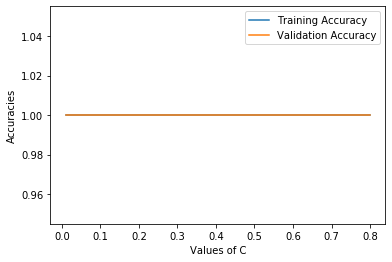

In [41]:
Parametertuning(X_train_scaled, X_validation_scaled, y_train, y_validation, reg_type)

In [42]:
c = float(input("Enter a good approximate regularisation constant c: "))
reg_new = Retrain(X_train_scaled, y_train, c, reg_type)

Enter a good approximate regularisation constant c:  0.1


In [43]:
#check the performance of the new model
print(f"Modified Train Accuracy: \t{reg_new.score(X_train_scaled, y_train)*100:.4}%")
print(f"Modified Validation Accuracy: \t{reg_new.score(X_validation_scaled, y_validation)*100:.4}%")
print(f"Modified Test Accuracy: \t{reg_new.score(X_test_scaled, y_test)*100:.4}%")

Modified Train Accuracy: 	100.0%
Modified Validation Accuracy: 	100.0%
Modified Test Accuracy: 	100.0%
